# Introduction

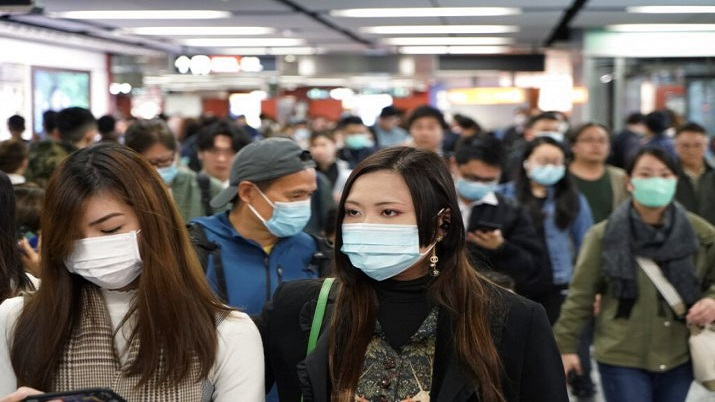

Coronavirus disease (COVID-19) is an infectious disease caused by a newly discovered coronavirus.

Most people infected with the COVID-19 virus will experience mild to moderate respiratory illness and recover without requiring special treatment. Older people, and those with underlying medical problems like cardiovascular disease, diabetes, chronic respiratory disease, and cancer are more likely to develop serious illness.

The best way to prevent and slow down transmission is be well informed about the COVID-19 virus, the disease it causes and how it spreads. Protect yourself and others from infection by washing your hands or using an alcohol based rub frequently and not touching your face.

The COVID-19 virus spreads primarily through droplets of saliva or discharge from the nose when an infected person coughs or sneezes, so it’s important that you also practice respiratory etiquette (for example, by coughing into a flexed elbow).

At this time, there are no specific vaccines or treatments for COVID-19. However, there are many ongoing clinical trials evaluating potential treatments. WHO will continue to provide updated information as soon as clinical findings become available.

Stay informed:

Protect yourself: advice for the public Myth busters Questions and answers Situation reports All information on the COVID-19 outbreak

# Importing Necessary Packages

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.graph_objects as go

In [2]:
#!pip install plotly

In [3]:
train=pd.read_csv(r"train.csv")
test=pd.read_csv(r"test.csv")

In [4]:
train.sample(6)

Id        Province_State  Country_Region        Date  \
16248  23209  District of Columbia              US  2020-01-30   
11500  16421                   NaN          Mexico  2020-02-11   
19265  27516         West Virginia              US  2020-02-06   
19772  28233        Cayman Islands  United Kingdom  2020-02-23   
1034    1455              Victoria       Australia  2020-03-16   
8283   11824                   NaN           Gabon  2020-02-14   

       ConfirmedCases  Fatalities  
16248             0.0         0.0  
11500             0.0         0.0  
19265             0.0         0.0  
19772             0.0         0.0  
1034             71.0         0.0  
8283              0.0         0.0

In [5]:
test.sample(6)

ForecastId Province_State Country_Region        Date
1786         1787    Nova Scotia         Canada  2020-04-11
11640       11641           Utah             US  2020-04-18
2117         2118          Anhui          China  2020-03-29
7547         7548   Sint Maarten    Netherlands  2020-04-10
11494       11495   South Dakota             US  2020-04-01
9348         9349            NaN       Tanzania  2020-04-05

# EDA

In [6]:
df = train.fillna('NA').groupby(['Country_Region','Province_State','Date'])['ConfirmedCases'].sum() \
                          .groupby(['Country_Region','Province_State']).max().sort_values() \
                          .groupby(['Country_Region']).sum().sort_values(ascending = False)

top10 = pd.DataFrame(df).head(10)
top10

ConfirmedCases
Country_Region                
US                    188018.0
Italy                 105792.0
Spain                  95923.0
China                  82280.0
Germany                71808.0
France                 52827.0
Iran                   44605.0
United Kingdom         25471.0
Switzerland            16605.0
Turkey                 13531.0

Confirmed COVID-19 Cases by country

In [7]:
fig = px.bar(top10, x=top10.index, y='ConfirmedCases', labels={'x':'Country'},
             color="ConfirmedCases", color_continuous_scale=px.colors.sequential.Brwnyl)
fig.update_layout(title_text='Confirmed COVID-19 cases by country')
fig.show()

From the above graph, we can say that US has most Confirmed cases and followed by italy.
The virus has began at China but virus is showing a  greater impact on US and Italy than China

Confirmed COVID-19 cases per day in US

In [8]:
df_by_date = pd.DataFrame(train.fillna('NA').groupby(['Country_Region','Date'])['ConfirmedCases'].sum().sort_values().reset_index())

fig = px.bar(df_by_date.loc[(df_by_date['Country_Region'] == 'US') &(df_by_date.Date >= '2020-03-01')].sort_values('ConfirmedCases',ascending = False), 
             x='Date', y='ConfirmedCases', color="ConfirmedCases", color_continuous_scale=px.colors.sequential.BuGn)
fig.update_layout(title_text='Confirmed COVID-19 cases per day in US')
fig.show()

From this graph we can say that,with in short period of time virus has spread more in US and kept in 1st place

In [9]:
df_by_date = pd.DataFrame(train.fillna('NA').groupby(['Country_Region','Date'])['ConfirmedCases'].sum().sort_values().reset_index())

fig = px.bar(df_by_date.loc[(df_by_date['Country_Region'] == 'Italy') &(df_by_date.Date >= '2020-03-01')].sort_values('ConfirmedCases',ascending = False), 
             x='Date', y='ConfirmedCases', color="ConfirmedCases", color_continuous_scale=px.colors.sequential.BuGn)
fig.update_layout(title_text='Confirmed COVID-19 cases per day in Italy')
fig.show()

In italy, Spreading of virus done for a long time and thus effected more people. But in US within short period the spread is more in this way US had a great impact

Confirmed COVID-19 cases per day in China

In [10]:
df_by_date = pd.DataFrame(train.fillna('NA').groupby(['Country_Region','Date'])['ConfirmedCases'].sum().sort_values().reset_index())

fig = px.bar(df_by_date.loc[(df_by_date['Country_Region'] == 'China') &(df_by_date.Date >= '2020-01-01')].sort_values('ConfirmedCases',ascending = False), 
             x='Date', y='ConfirmedCases', color="ConfirmedCases", color_continuous_scale=px.colors.sequential.BuGn)
fig.update_layout(title_text='Confirmed COVID-19 cases per day in China')
fig.show()

From the above graph, we can say that, In china this virus has started and continued to spread. From this region, virus began to spread all parts of the world. In china the confirmed cases are increasing day by day.

Confirmed COVID-19 cases per day in Spain

In [11]:
df_by_date = pd.DataFrame(train.fillna('NA').groupby(['Country_Region','Date'])['ConfirmedCases'].sum().sort_values().reset_index())

fig = px.bar(df_by_date.loc[(df_by_date['Country_Region'] == 'Spain') &(df_by_date.Date >= '2020-03-01')].sort_values('ConfirmedCases',ascending = False), 
             x='Date', y='ConfirmedCases', color="ConfirmedCases", color_continuous_scale=px.colors.sequential.BuGn)
fig.update_layout(title_text='Confirmed COVID-19 cases per day in Spain')
fig.show()

Confirmed COVID-19 Cases per day in Germany

In [12]:
df_by_date = pd.DataFrame(train.fillna('NA').groupby(['Country_Region','Date'])['ConfirmedCases'].sum().sort_values().reset_index())

fig = px.bar(df_by_date.loc[(df_by_date['Country_Region'] == 'Germany') &(df_by_date.Date >= '2020-03-01')].sort_values('ConfirmedCases',ascending = False), 
             x='Date', y='ConfirmedCases', color="ConfirmedCases", color_continuous_scale=px.colors.sequential.BuGn)
fig.update_layout(title_text='Confirmed COVID-19 cases per day in Germany')
fig.show()

Confirmed COVID-19 cases Per day in India

In [13]:
df_by_date = pd.DataFrame(train.fillna('NA').groupby(['Country_Region','Date'])['ConfirmedCases'].sum().sort_values().reset_index())

fig = px.bar(df_by_date.loc[(df_by_date['Country_Region'] == 'India') &(df_by_date.Date >= '2020-03-01')].sort_values('ConfirmedCases',ascending = False), 
             x='Date', y='ConfirmedCases', color="ConfirmedCases", color_continuous_scale=px.colors.sequential.BuGn)
fig.update_layout(title_text='Confirmed COVID-19 cases per day in India')
fig.show()

The confirmed Cases compared to US, China, Italy , Spain and Germany are very less in India. But once it starts spreading it will show a greater impact.

For day to day track of this COVID-19 Cases, Deaths please refer my another notebook [https://www.kaggle.com/eswarchandt/geospatial-analysis-on-covid-19](http://)

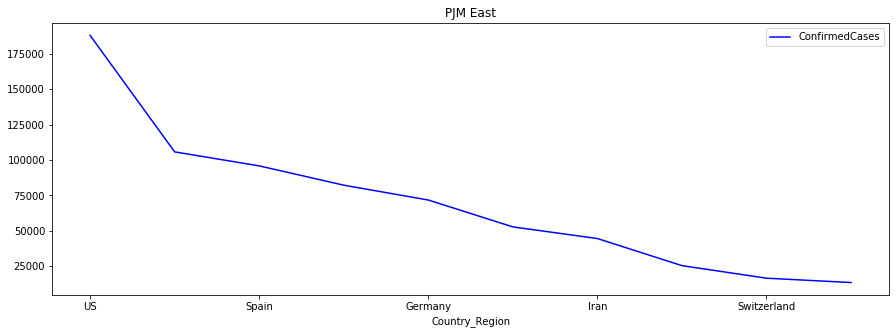

In [14]:
top10.plot(figsize=(15,5), color='blue', title='PJM East')
plt.show()

In [15]:
test['Date'] = pd.to_datetime(test['Date'])
train['Date'] = pd.to_datetime(train['Date'])
train = train.set_index(['Date'])
test = test.set_index(['Date'])

In [16]:

def create_features(df,label=None):
    """
    Creates time series features from datetime index.
    """
    df = df.copy()
    df['Date'] = df.index
    df['hour'] = df['Date'].dt.hour
    df['dayofweek'] = df['Date'].dt.dayofweek
    df['quarter'] = df['Date'].dt.quarter
    df['month'] = df['Date'].dt.month
    df['year'] = df['Date'].dt.year
    df['dayofyear'] = df['Date'].dt.dayofyear
    df['dayofmonth'] = df['Date'].dt.day
    df['weekofyear'] = df['Date'].dt.weekofyear
    
    X = df[['hour','dayofweek','quarter','month','year',
           'dayofyear','dayofmonth','weekofyear']]
   
    return X


In [17]:
train_features=pd.DataFrame(create_features(train))
train_features

hour  dayofweek  quarter  month  year  dayofyear  dayofmonth  \
Date                                                                       
2020-01-22     0          2        1      1  2020         22          22   
2020-01-23     0          3        1      1  2020         23          23   
2020-01-24     0          4        1      1  2020         24          24   
2020-01-25     0          5        1      1  2020         25          25   
2020-01-26     0          6        1      1  2020         26          26   
...          ...        ...      ...    ...   ...        ...         ...   
2020-03-27     0          4        1      3  2020         87          27   
2020-03-28     0          5        1      3  2020         88          28   
2020-03-29     0          6        1      3  2020         89          29   
2020-03-30     0          0        1      3  2020         90          30   
2020-03-31     0          1        1      3  2020         91          31   

            weekofyear  
Date                    
2020-01-22           4  
2020-01-23           4  
2020-01-24           4  
2020-01-25           4  
2020-01-26           4  
...                ...  
2020-03-27          13  
2020-03-28          13  
2020-03-29          13  
2020-03-30          14  
2020-03-31          14  

[20580 rows x 8 columns]

In [18]:
test_features=pd.DataFrame(create_features(test))
test_features

hour  dayofweek  quarter  month  year  dayofyear  dayofmonth  \
Date                                                                       
2020-03-19     0          3        1      3  2020         79          19   
2020-03-20     0          4        1      3  2020         80          20   
2020-03-21     0          5        1      3  2020         81          21   
2020-03-22     0          6        1      3  2020         82          22   
2020-03-23     0          0        1      3  2020         83          23   
...          ...        ...      ...    ...   ...        ...         ...   
2020-04-26     0          6        2      4  2020        117          26   
2020-04-27     0          0        2      4  2020        118          27   
2020-04-28     0          1        2      4  2020        119          28   
2020-04-29     0          2        2      4  2020        120          29   
2020-04-30     0          3        2      4  2020        121          30   

            weekofyear  
Date                    
2020-03-19          12  
2020-03-20          12  
2020-03-21          12  
2020-03-22          12  
2020-03-23          13  
...                ...  
2020-04-26          17  
2020-04-27          18  
2020-04-28          18  
2020-04-29          18  
2020-04-30          18  

[12642 rows x 8 columns]

In [19]:
features_and_target_train = pd.concat([train,train_features], axis=1)
features_and_target_train.sample(6)

Id Province_State Country_Region  ConfirmedCases  Fatalities  \
Date                                                                          
2020-02-14  22424        Alabama             US             0.0         0.0   
2020-03-15  26254         Oregon             US            36.0         1.0   
2020-03-16  18555            NaN         Panama            55.0         1.0   
2020-02-22  17232            NaN          Nepal             1.0         0.0   
2020-03-30  23869       Illinois             US          5056.0        73.0   
2020-03-26   4865            NaN          Chile          1306.0         4.0   

            hour  dayofweek  quarter  month  year  dayofyear  dayofmonth  \
Date                                                                       
2020-02-14     0          4        1      2  2020         45          14   
2020-03-15     0          6        1      3  2020         75          15   
2020-03-16     0          0        1      3  2020         76          16   
2020-02-22     0          5        1      2  2020         53          22   
2020-03-30     0          0        1      3  2020         90          30   
2020-03-26     0          3        1      3  2020         86          26   

            weekofyear  
Date                    
2020-02-14           7  
2020-03-15          11  
2020-03-16          12  
2020-02-22           8  
2020-03-30          14  
2020-03-26          13

In [20]:
features_and_target_test = pd.concat([test,test_features], axis=1)
features_and_target_test.sample(6)

ForecastId Province_State Country_Region  hour  dayofweek  \
Date                                                                    
2020-03-23        8046            NaN       Paraguay     0          0   
2020-04-12        5185            NaN        Georgia     0          6   
2020-04-20         592       Tasmania      Australia     0          0   
2020-04-17        2180        Beijing          China     0          4   
2020-04-07          20            NaN    Afghanistan     0          1   
2020-03-26        4867  New Caledonia         France     0          3   

            quarter  month  year  dayofyear  dayofmonth  weekofyear  
Date                                                                 
2020-03-23        1      3  2020         83          23          13  
2020-04-12        2      4  2020        103          12          15  
2020-04-20        2      4  2020        111          20          17  
2020-04-17        2      4  2020        108          17          16  
2020-04-07        2      4  2020         98           7          15  
2020-03-26        1      3  2020         86          26          13

In [21]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
def FunLabelEncoder(df):
    for c in df.columns:
        if df.dtypes[c] == object:
            le.fit(df[c].astype(str))
            df[c] = le.transform(df[c].astype(str))
    return df

In [22]:
features_and_target_train= FunLabelEncoder(features_and_target_train)
features_and_target_train.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 20580 entries, 2020-01-22 to 2020-03-31
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Id              20580 non-null  int64  
 1   Province_State  20580 non-null  int32  
 2   Country_Region  20580 non-null  int32  
 3   ConfirmedCases  20580 non-null  float64
 4   Fatalities      20580 non-null  float64
 5   hour            20580 non-null  int64  
 6   dayofweek       20580 non-null  int64  
 7   quarter         20580 non-null  int64  
 8   month           20580 non-null  int64  
 9   year            20580 non-null  int64  
 10  dayofyear       20580 non-null  int64  
 11  dayofmonth      20580 non-null  int64  
 12  weekofyear      20580 non-null  int64  
dtypes: float64(2), int32(2), int64(9)
memory usage: 2.0 MB


In [23]:
features_and_target_test= FunLabelEncoder(features_and_target_test)
features_and_target_test.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 12642 entries, 2020-03-19 to 2020-04-30
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   ForecastId      12642 non-null  int64
 1   Province_State  12642 non-null  int32
 2   Country_Region  12642 non-null  int32
 3   hour            12642 non-null  int64
 4   dayofweek       12642 non-null  int64
 5   quarter         12642 non-null  int64
 6   month           12642 non-null  int64
 7   year            12642 non-null  int64
 8   dayofyear       12642 non-null  int64
 9   dayofmonth      12642 non-null  int64
 10  weekofyear      12642 non-null  int64
dtypes: int32(2), int64(9)
memory usage: 1.1 MB


In [24]:
x_train= features_and_target_train[['Country_Region','month', 'dayofyear', 'dayofmonth' , 'weekofyear']]
y1 = features_and_target_train[['ConfirmedCases']]
y2 =features_and_target_train[['Fatalities']]
x_test = features_and_target_test[['Country_Region', 'month', 'dayofyear', 'dayofmonth' , 'weekofyear']]

In [25]:
pip list

Package                            Version            
---------------------------------- -------------------
absl-py                            0.9.0              
alabaster                          0.7.12             
anaconda-client                    1.7.2              
anaconda-navigator                 1.9.12             
anaconda-project                   0.8.3              
argh                               0.26.2             
asn1crypto                         1.3.0              
astor                              0.8.1              
astroid                            2.3.3              
astropy                            4.0                
atomicwrites                       1.3.0              
attrs                              19.3.0             
autopep8                           1.4.4              
Babel                              2.8.0              
backcall                           0.1.0              
backports.functools-lru-cache      1.6.1              
backports.

In [28]:
!pip install fbprophet


  Using cached fbprophet-0.6.tar.gz (54 kB)
  Running setup.py clean for fbprophet
Failed to build fbprophet
    Running setup.py install for fbprophet: started
    Running setup.py install for fbprophet: finished with status 'error'


  ERROR: Command errored out with exit status 1:
   command: 'C:\Users\khushboo\Anaconda3\python.exe' -u -c 'import sys, setuptools, tokenize; sys.argv[0] = '"'"'C:\\Users\\khushboo\\AppData\\Local\\Temp\\pip-install-6o1q0mkk\\fbprophet\\setup.py'"'"'; __file__='"'"'C:\\Users\\khushboo\\AppData\\Local\\Temp\\pip-install-6o1q0mkk\\fbprophet\\setup.py'"'"';f=getattr(tokenize, '"'"'open'"'"', open)(__file__);code=f.read().replace('"'"'\r\n'"'"', '"'"'\n'"'"');f.close();exec(compile(code, __file__, '"'"'exec'"'"'))' bdist_wheel -d 'C:\Users\khushboo\AppData\Local\Temp\pip-wheel-e98me8gy'
       cwd: C:\Users\khushboo\AppData\Local\Temp\pip-install-6o1q0mkk\fbprophet\
  Complete output (10 lines):
  running bdist_wheel
  running build
  running build_py
  creating build
  creating build\lib
  creating build\lib\fbprophet
  creating build\lib\fbprophet\stan_model
  INFO:pystan:COMPILING THE C++ CODE FOR MODEL anon_model_ad32c37d592cdbc572cbc332ac6d2ee2 NOW.
  error: Microsoft Visual C++ 14.0

In [30]:
from fbprophet import Prophet
model=Prophet()
model.fit(features_and_target_train.reset_index() \
              .rename(columns={'Date':'ds',
                               'ConfirmedCases':'y'}))

ModuleNotFoundError: No module named 'fbprophet'

In [31]:
Covid_test_forecast=model.predict(df=features_and_target_test.reset_index() \
                                   .rename(columns={'Date':'ds'}))

NameError: name 'model' is not defined

In [26]:
Covid_test_forecast.tail()

ds        trend   yhat_lower    yhat_upper  trend_lower  \
13153 2020-05-07  8941.348079  2783.854969  15484.204107  8172.145328   
13154 2020-05-07  8941.348079  2526.733571  14566.068837  8172.145328   
13155 2020-05-07  8941.348079  2583.406758  15304.194533  8172.145328   
13156 2020-05-07  8941.348079  3015.152605  15194.370350  8172.145328   
13157 2020-05-07  8941.348079  2276.128650  15248.888650  8172.145328   

       trend_upper  additive_terms  additive_terms_lower  \
13153  9761.102143       18.758001             18.758001   
13154  9761.102143       18.758001             18.758001   
13155  9761.102143       18.758001             18.758001   
13156  9761.102143       18.758001             18.758001   
13157  9761.102143       18.758001             18.758001   

       additive_terms_upper     weekly  weekly_lower  weekly_upper  \
13153             18.758001  18.758001     18.758001     18.758001   
13154             18.758001  18.758001     18.758001     18.758001   
13155             18.758001  18.758001     18.758001     18.758001   
13156             18.758001  18.758001     18.758001     18.758001   
13157             18.758001  18.758001     18.758001     18.758001   

       multiplicative_terms  multiplicative_terms_lower  \
13153                   0.0                         0.0   
13154                   0.0                         0.0   
13155                   0.0                         0.0   
13156                   0.0                         0.0   
13157                   0.0                         0.0   

       multiplicative_terms_upper         yhat  
13153                         0.0  8960.106081  
13154                         0.0  8960.106081  
13155                         0.0  8960.106081  
13156                         0.0  8960.106081  
13157                         0.0  8960.106081

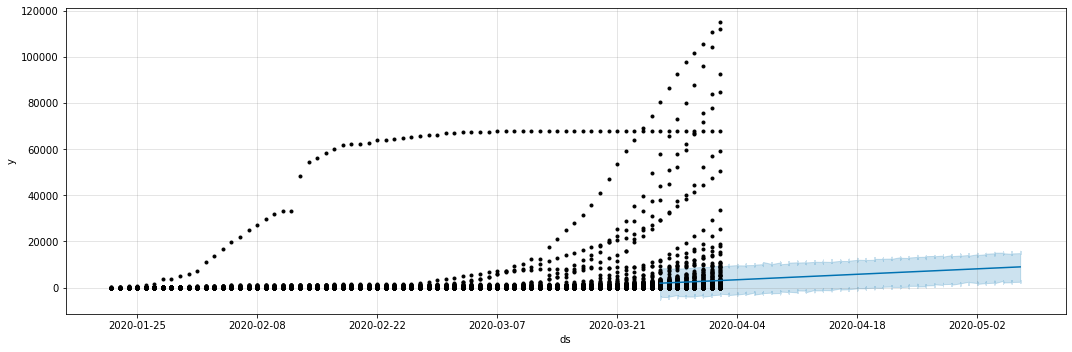

In [27]:
# Plot the forecast
f, ax = plt.subplots(1)
f.set_figheight(5)
f.set_figwidth(15)
fig = model.plot(Covid_test_forecast,
                 ax=ax)
plt.show()

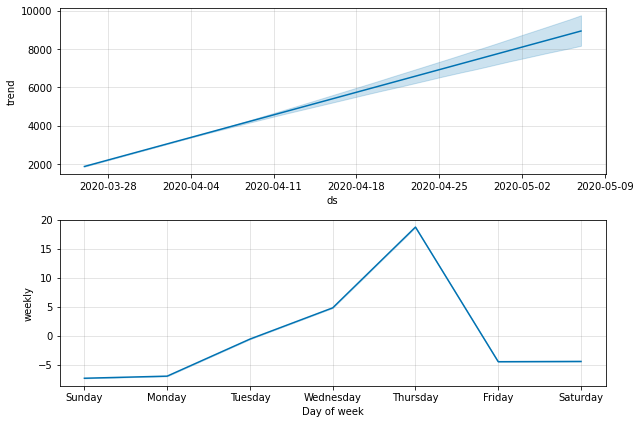

In [28]:
# Plot the components of the model
fig = model.plot_components(Covid_test_forecast)

In [29]:
model_1=Prophet()
model_1.fit(features_and_target_train.reset_index() \
              .rename(columns={'Date':'ds',
                               'Fatalities':'y'}))

In [30]:
Covid_test_forecast_Fatilities=model.predict(df=features_and_target_test.reset_index() \
                                   .rename(columns={'Date':'ds'}))

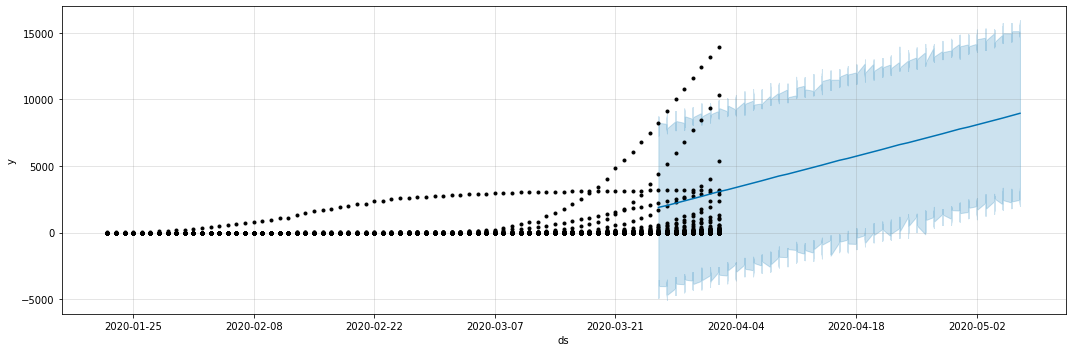

In [31]:
# Plot the forecast
f, ax = plt.subplots(1)
f.set_figheight(5)
f.set_figwidth(15)
fig = model_1.plot(Covid_test_forecast_Fatilities,
                 ax=ax)
plt.show()

The shaded part is the forecasted result

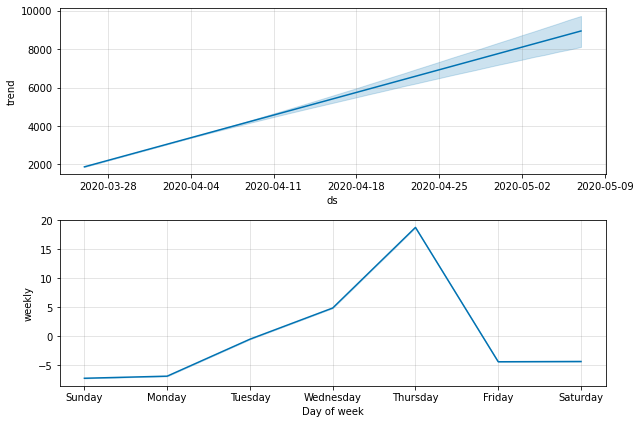

In [32]:
fig = model.plot_components(Covid_test_forecast_Fatilities)